#Annova test

~ Analysis of Variance(Annova) is a statistical method used to compare the means of 2 or more groups.

~ ANOVA test checks whether a difference in the average somewhere in the model or not (checking whether there was an overall effect or not); however, this method doesn't tell us the spot of the difference (if there is one).

~ In order to perform any test, we first define null and alternate hypothesis.

Null Hypothesis:There is no noteworthy difference between the groups.


Alternate Hypothesis:There is a noteworthy difference between the groups.

~ We can perform an ANOVA Test by comparing two types of variations. The First variation is between the sample means and the other one within each of the samples. The formula shown below describes one-way ANOVA Test statistics.

~ The output of the ANOVA formula, the F statistic (also known as the F-ratio), enables the analysis of the multiple sets of data in order to determine the variability among the samples and within samples.

~ ANOVA uses the F-test to determine whether the variability between group means is larger than the variability of the observations within the groups. If that ratio is sufficiently large, you can conclude that not all the means are equal.

~ The ANOVA Tests can be classified into three major types. These types are shown below:

~ One-Way ANOVA Test - An Analysis of Variance Test that has only one independent variable is known as the One-way ANOVA Test.

~ Two-Way ANOVA Test - An Analysis of Variance Test that has two independent variables is known as a Two-way ANOVA test. This test is also known as Factorial ANOVA Test.

~ n-Way ANOVA Test - An Analysis of Variance Test is considered an n-way ANOVA Test if a researcher uses more than two independent variables. Here n represents the number of independent variables we have. This Test is also known as MANOVA Test.

~ The Following problem has Diet Dataset, we will perform Annova on it as follows:

~ Considering hypothesis for the problem -

• Null hypothesis - "For every diet, the mean of the people's weights is the same."

• Alternate hypothesis - "For every diet, the mean of the people's weights is not same."

~ Also,considering 95% confidence interval; 

• if p-value <= 0.05,we reject null hypothesis. 

• if p-value > 0.05,we accept null hypothesis.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import seaborn as sns  
import numpy as np  
import pandas.tseries  
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/bioinformatics-core-shared-training/linear-models-r/master/data/diet.csv")

In [ ]:
data.head()

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [ ]:
data.rename(columns={"diet.type":"diet_type","initial.weight":"initial_weight","final.weight":"final_weight"},inplace = True)

In [ ]:
data.head()

,id,gender,age,height,diet_type,initial_weight,final_weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [ ]:
print('The total number of rows in the dataset:',data.size)

The total number of rows in the dataset: 532


In [ ]:
# Checking for missing values

print(data.gender.unique())  
 
print(data[data.gender == ' '])

['Female' 'Male']
Empty DataFrame
Columns: [id, gender, age, height, diet.type, initial.weight, final.weight]
Index: []


<ipython-input-49-9fcf122c6820>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.gender == 'Male'].final_weight, ax = ax, label = 'Male')
<ipython-input-49-9fcf122c6820>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.gender == 'Female'].final_weight, ax = ax, label = 'Femal

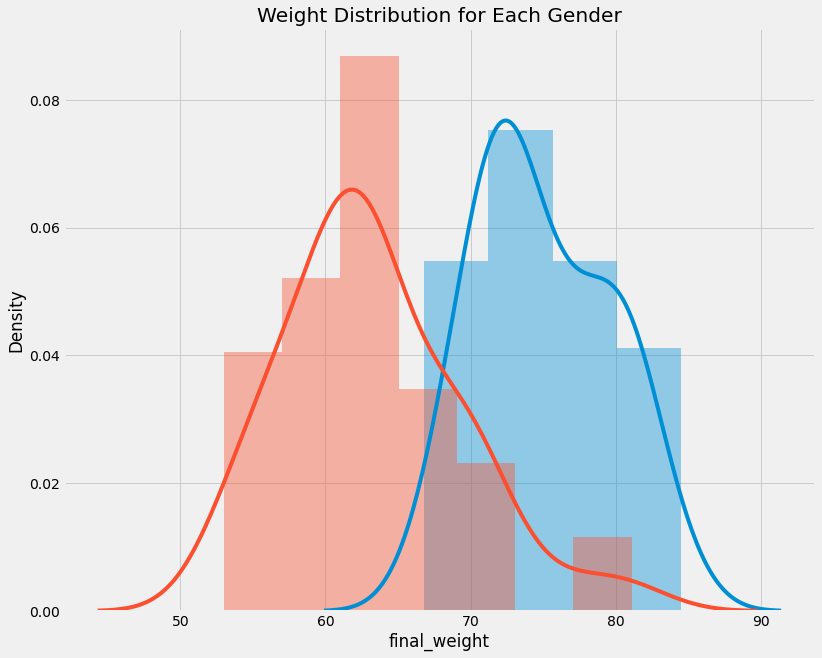

In [ ]:
# Weight distribution

f, ax = plt.subplots( figsize = (12,10) )  
sns.distplot(data[data.gender == 'Male'].final_weight, ax = ax, label = 'Male')  
sns.distplot(data[data.gender == 'Female'].final_weight, ax = ax, label = 'Female')  
plt.title('Weight Distribution for Each Gender')    
plt.show()

In [ ]:
data.agg = data.groupby(['gender', 'diet_type']).agg([np.mean, np.median, np.count_nonzero, np.std]).final_weight
data.agg

mean  median  count_nonzero       std
gender diet_type                                            
Female A          64.878571   64.50             14  6.877296
       B          62.178571   61.15             14  6.274635
       C          62.653333   61.80             15  5.370537
Male   A          76.150000   75.75             10  5.439414
       B          73.163636   72.70             11  3.818448
       C          75.766667   76.35             12  4.434848

In [ ]:
F = ols('height ~ diet_type', data = data[data.gender =='Female']).fit()  
 
aovtable = sm.stats.anova_lm(F, typ = 2)  
print('ANOVA table for Female')  
print('----------------------')  
print(aovtable)   
print("")
print("") 

M = ols('height ~ diet_type', data = data[data.gender=='Male']).fit()  

aovtable = sm.stats.anova_lm(M, typ = 2)  
print('ANOVA table for Male')  
print('----------------------')  
print(aovtable)

ANOVA table for Female
----------------------
                sum_sq    df         F    PR(>F)
diet_type   565.938870   2.0  3.548397  0.038139
Residual   3189.828571  40.0       NaN       NaN


ANOVA table for Male
----------------------
                sum_sq    df        F    PR(>F)
diet_type  1367.893939   2.0  5.87219  0.007044
Residual   3494.166667  30.0      NaN       NaN


~ Here, after the test we find 2 p-values(PR(>F)) for Males and Females.

~ In case of Females, the p-value 0.038139 is less than 0.05. So we reject the null hypothesis.

~ In case of Males, the p-value 0.007044 is less than 0.05. So we reject the null hypothesis.

~ Hence, we can conclude that there is difference found in heights and weights of both Males and Females with respect to diet types.

• So, now we understand the effect of diet on Males and Females; however, we are not aware of the difference between the diets. So, we will perform a post hoc analysis with the help of the Tukey HSD (Honest Significant Difference) test.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison  
# For Females 
mydf = data[data.gender == 'Female']  
  
  
multiComp = MultiComparison(mydf['height'], mydf['diet_type'])  
tukeyres = multiComp.tukeyhsd(alpha = 0.05)  
  
print(tukeyres)  
print('Unique diet groups: ', multiComp.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -3.5714 0.5452 -11.7865  4.6436  False
     A      C  -8.7714 0.0307 -16.8484 -0.6944   True
     B      C     -5.2 0.2715  -13.277   2.877  False
-----------------------------------------------------
Unique diet groups:  ['A' 'B' 'C']


In [ ]:
# For Males
mydf1 = data[data.gender == 'Male']  
  
  
multiComp = MultiComparison(mydf1['height'], mydf1['diet_type'])  
tukeyres = multiComp.tukeyhsd(alpha = 0.05)  
  
print(tukeyres)  
print('Unique diet groups: ', multiComp.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     15.5 0.0071   3.8751 27.1249   True
     A      C   4.3333 0.6211  -7.0586 15.7252  False
     B      C -11.1667 0.0485 -22.2725 -0.0608   True
-----------------------------------------------------
Unique diet groups:  ['A' 'B' 'C']


~ As we can observe for both Females and Males, we can only reject the null hypothesis among the 1st and 3rd types of diet, which means that a statistically significant difference is present in weight for diet A and diet C.